In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [177]:
#Read csv file
data = pd.read_csv("customer_dataset.csv")


In [178]:
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [179]:
#checking for the predominate values
data["ContractRenewal"].unique()

array([1, 0], dtype=int64)

In [181]:
data["DataPlan"].unique()

array([1, 0], dtype=int64)

In [182]:
#descibes the data for each column 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [113]:
#check for null values
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64



Exploratory Data Analysis


Text(0.5, 0, 'Churn')

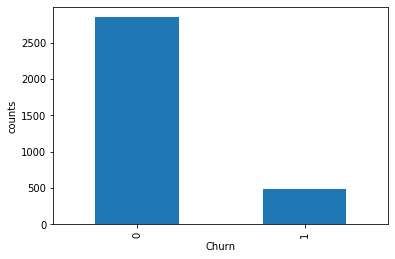

In [185]:
data["Churn"].value_counts().plot.bar()
plt.ylabel('counts')
plt.xlabel('Churn')

Text(0.5, 0, 'ContractRenewal')

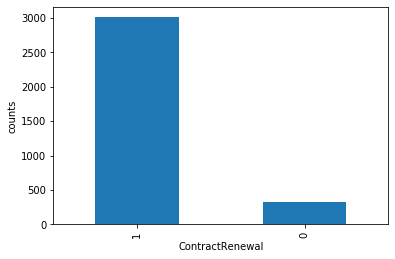

In [186]:
data["ContractRenewal"].value_counts().plot.bar()
plt.ylabel('counts')
plt.xlabel('ContractRenewal')

Text(0.5, 0, 'DataPlan')

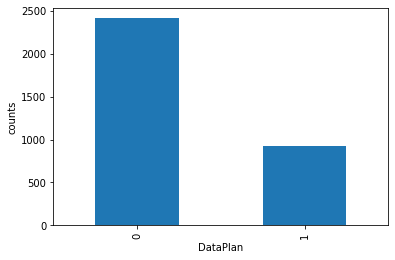

In [188]:
data["DataPlan"].value_counts().plot.bar()
plt.ylabel('counts')
plt.xlabel('DataPlan')

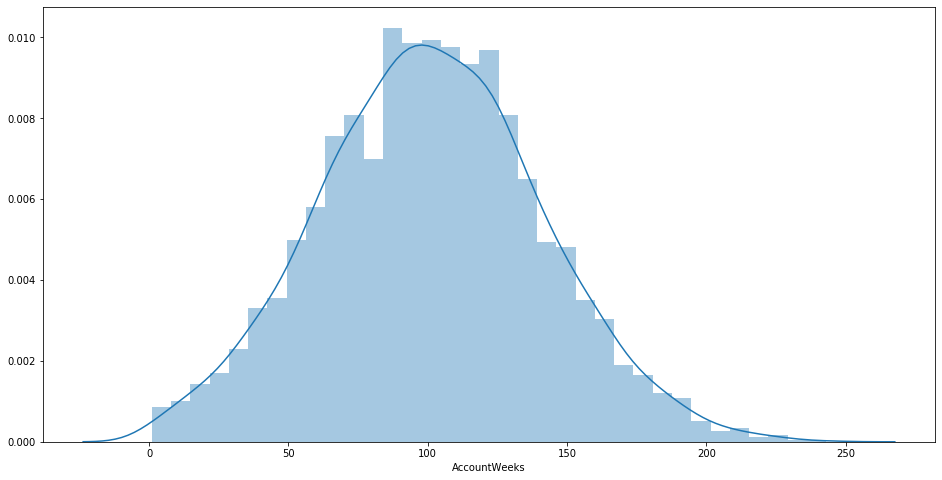

In [114]:
plt.figure(figsize =(16, 8))
sns.distplot(data["AccountWeeks"])

In [189]:
from scipy import stats
z = np.abs(stats.zscore(data))
z

array([[0.41167182, 0.67648946, 0.32758048, ..., 1.99072703, 0.0715836 ,
        0.08500823],
       [0.41167182, 0.14906505, 0.32758048, ..., 1.56451025, 0.10708191,
        1.24048169],
       [0.41167182, 0.9025285 , 0.32758048, ..., 0.26213309, 1.57434567,
        0.70312091],
       ...,
       [0.41167182, 1.83505538, 0.32758048, ..., 0.01858065, 1.73094204,
        1.3837779 ],
       [0.41167182, 2.08295458, 3.05268496, ..., 0.38390932, 0.81704825,
        1.87621082],
       [0.41167182, 0.67974475, 0.32758048, ..., 2.66049626, 1.28129669,
        1.24048169]])

In [200]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

414

In [205]:
#drop outliers

new_data = data.drop(outliers,axis = 0).reset_index(drop = False)
display(new_data)

y_new = y[list(new_data["index"])]
len(y_new)

,index,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
4,8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3327,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
2915,3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
2916,3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
2917,3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


2919

In [206]:
new_data = new_data.drop ('index', axis = 1)

Text(0, 0.5, 'counts')

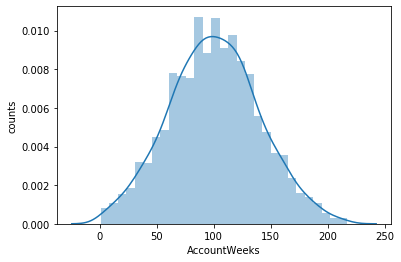

In [212]:
sns.distplot(new_data["AccountWeeks"])
plt.ylabel("counts")

In [213]:
new_data.duplicated().sum()

0

In [224]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X_new)
X_scaled

array([[-0.35150616,  0.69196206,  0.        , ...,  2.05929645,
        -0.068431  , -0.0941079 ],
       [-0.35150616,  0.1624696 ,  0.        , ...,  1.62161451,
        -0.10450144,  1.29308134],
       [-0.35150616,  0.9188874 ,  0.        , ..., -0.25416527,
        -1.59541298,  0.73070732],
       ...,
       [-0.35150616, -0.82087355,  0.        , ...,  0.0209491 ,
        -0.95015288, -0.2440743 ],
       [-0.35150616, -1.82943062,  0.        , ..., -0.0040613 ,
         1.76314581,  1.44304774],
       [-0.35150616, -0.66958999,  0.        , ...,  2.74708237,
         1.30625356,  1.29308134]])

In [228]:
std= StandardScaler()

In [229]:
df = std.fit_transform(new_data.drop(columns = ["Churn","ContractRenewal","DataPlan"]))


In [221]:
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [230]:
df1 = pd.DataFrame(columns = ('AccountWeeks','CustServCalls', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins'), data =df)

In [231]:
df1.head()

,AccountWeeks,CustServCalls,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0.691962,1.517961,-0.428164,1.603349,0.483568,2.059296,-0.068431,-0.094108
1,0.162470,2.317213,-0.428164,-0.332611,1.147964,1.621615,-0.104501,1.293081
2,0.918887,-0.640021,-1.255854,1.197452,0.687998,-0.254165,-1.595413,0.730707
3,0.515465,0.982462,1.227215,0.726088,-0.640795,1.953002,2.961486,-1.031398
4,0.414609,-0.488163,-0.428164,0.095732,-0.180828,0.489894,3.021603,-0.581499


In [232]:
df1["Churn"] = new_data["Churn"]

In [233]:
df1["ContractRenewal"] = new_data["ContractRenewal"]

In [234]:
df1["DataPlan"] = new_data["DataPlan"]

In [235]:
df1.head()

,AccountWeeks,CustServCalls,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn,ContractRenewal,DataPlan
0,0.691962,1.517961,-0.428164,1.603349,0.483568,2.059296,-0.068431,-0.094108,0,1,1
1,0.162470,2.317213,-0.428164,-0.332611,1.147964,1.621615,-0.104501,1.293081,0,1,1
2,0.918887,-0.640021,-1.255854,1.197452,0.687998,-0.254165,-1.595413,0.730707,0,1,0
3,0.515465,0.982462,1.227215,0.726088,-0.640795,1.953002,2.961486,-1.031398,0,1,1
4,0.414609,-0.488163,-0.428164,0.095732,-0.180828,0.489894,3.021603,-0.581499,0,1,0


In [236]:
from sklearn.model_selection import train_test_split

In [238]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Churn', axis=1), df1['Churn'], test_size=0.3, random_state=42)


In [239]:
X_test.shape

(876, 10)

In [241]:
y_train.shape

(2043,)

In [242]:
from concurrent.futures import ThreadPoolExecutor
from sklearn.metrics import classification_report, confusion_matrix


#defining the function
def model_testing(md):
    with ThreadPoolExecutor(max_workers=2) as executor:
        executor.submit(md.fit, X_train, y_train)
    print("Training Accuracy: ", md.score(X_train, y_train), '\n')
    print("Testing Accuracy: ", md.score(X_test, y_test), '\n')
    print(classification_report(y_test, md.predict(X_test)))
    return md.predict(data.drop(columns=['Churn']))

In [243]:
#using logistic regression
from sklearn.linear_model import LogisticRegression

In [245]:
log = LogisticRegression(solver="liblinear", C=10)

In [246]:
model_testing(log)

Training Accuracy:  0.8986784140969163 

Testing Accuracy:  0.8949771689497716 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       778
           1       0.69      0.11      0.19        98

    accuracy                           0.89       876
   macro avg       0.79      0.55      0.57       876
weighted avg       0.88      0.89      0.86       876



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [248]:
log.intercept_


array([-1.32537244])

In [249]:
log.coef_

array([[-0.00901184, -0.05273569,  0.63092688,  1.25631552,  0.15499808,
        -0.61028224,  0.54711596,  0.14088729, -1.32537244, -0.34774713]])

In [250]:
log.predict_proba(X_train)

array([[0.81491176, 0.18508824],
       [0.89457612, 0.10542388],
       [0.87454106, 0.12545894],
       ...,
       [0.98249374, 0.01750626],
       [0.98067899, 0.01932101],
       [0.61991322, 0.38008678]])

In [251]:
confusion_matrix(y_train, log.predict(X_train))

array([[1806,   14],
       [ 193,   30]], dtype=int64)

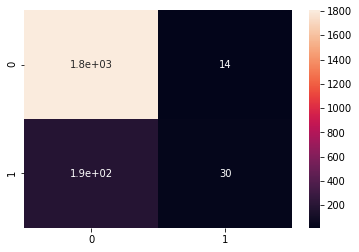

In [253]:
c_matrix = confusion_matrix(y_train, log.predict(X_train))
sns.heatmap(c_matrix, annot=True)

In [255]:
from sklearn.model_selection import GridSearchCV

In [256]:
gsc = GridSearchCV(estimator = log, param_grid  = {"C": [0.1,0.01,0.001,10,1]}, cv= 5)

In [257]:
gsc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=10, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.01, 0.001, 10, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [260]:
gsc.best_params_

{'C': 10}

In [261]:
gsc.best_score_

0.8986828227623567

In [262]:
#trying out support vector
from sklearn.svm import SVC

In [263]:
svc = SVC(C=10)

In [264]:
model_testing(svc)

Training Accuracy:  0.9627998042094958 

Testing Accuracy:  0.9531963470319634 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       778
           1       0.89      0.66      0.76        98

    accuracy                           0.95       876
   macro avg       0.92      0.83      0.87       876
weighted avg       0.95      0.95      0.95       876



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [266]:
from sklearn.ensemble import RandomForestClassifier

In [268]:
rfc = RandomForestClassifier(n_estimators=200)

In [269]:
model_testing(rfc)

Training Accuracy:  1.0 

Testing Accuracy:  0.952054794520548 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       778
           1       0.87      0.67      0.76        98

    accuracy                           0.95       876
   macro avg       0.91      0.83      0.87       876
weighted avg       0.95      0.95      0.95       876



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [270]:
rfc.predict_proba(X_train)

array([[1.   , 0.   ],
       [1.   , 0.   ],
       [0.965, 0.035],
       ...,
       [0.96 , 0.04 ],
       [1.   , 0.   ],
       [0.775, 0.225]])

In [271]:
confusion_matrix(y_train, rfc.predict(X_train))

array([[1820,    0],
       [   0,  223]], dtype=int64)

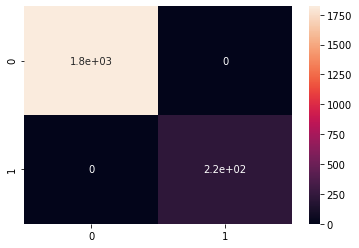

In [272]:
con_matrix = confusion_matrix(y_train, rfc.predict(X_train))
sns.heatmap(con_matrix, annot=True)